In [1]:

!pip install skrebate

In [2]:
!pip install mrmr_selection

In [1]:

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from skrebate import ReliefF
from mrmr import mrmr_classif

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from skrebate import ReliefF
from mrmr import mrmr_classif

# Load dataset from a CSV file
data = pd.read_csv("prostate.csv")
X = data.iloc[:, 1:-1]  # All columns except the last one
y = data.iloc[:, -1]   # Last column as target variable

# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, random_state=42)




In [2]:
data.head()

,samples,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V6025,V6026,V6027,V6028,V6029,V6030,V6031,V6032,V6033,response
0,1,-0.927178,-0.740039,-0.532016,-1.097891,-0.986673,0.018752,-0.863326,3.959997,-0.398219,...,-1.097891,-1.097891,-0.894733,0.850270,-1.097891,-0.302063,-0.767685,-0.452616,0.194001,normal
1,2,-0.835899,-0.835899,-0.585647,-0.835899,-0.329768,-0.835899,-0.835899,4.037788,-0.835899,...,-0.835899,-0.835899,-0.835899,0.038090,-0.835899,-0.835899,-0.835899,-0.835899,0.075500,normal
2,3,0.236073,0.252645,-1.154351,-0.372372,-0.338900,1.253467,0.506325,3.868961,0.201932,...,-1.154351,-1.154351,-0.372372,0.899781,-0.867200,0.360426,-1.154351,-1.154351,-1.154351,normal
3,4,-0.748623,-0.439165,0.790953,-1.033876,0.241115,1.216007,0.106282,3.976272,0.081755,...,-1.121534,-1.121534,-0.812076,1.230378,-0.355497,0.030647,-0.278810,-1.121534,-1.121534,normal
4,5,0.101239,-0.298285,-1.121519,-0.957714,0.342258,1.182937,0.029325,4.575871,-0.196466,...,-1.121519,-1.121519,-0.454932,0.891627,-0.593427,0.306316,-0.076496,-0.134480,-1.121519,normal


In [3]:
print(X.shape)
print(y.shape)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)""


(102, 6033)
(102,)


In [4]:
#X_train

In [5]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V6024', 'V6025', 'V6026', 'V6027', 'V6028', 'V6029', 'V6030', 'V6031',
       'V6032', 'V6033'],
      dtype='object', length=6033)

In [6]:
# 1. ReliefF
relief = ReliefF(n_neighbors=100, n_features_to_select=len(X.columns))
relief.fit(X.values, y.values)
relief_ranking = relief.feature_importances_
relief_feature_ranking = pd.Series(relief_ranking, index=X.columns).sort_values(ascending=False)
print("Feature rankings by ReliefF:")
print(relief_feature_ranking)


Feature rankings by ReliefF:
V2619    0.272879
V1839    0.243515
V5016    0.195370
V4155    0.168057
V5808    0.165104
           ...   
V3471    0.000797
V4843    0.000758
V4978    0.000679
V86      0.000669
V4835    0.000667
Length: 6033, dtype: float64


In [7]:
relief_feature_ranking1 = pd.Series(relief_ranking).sort_values(ascending=False)
print(relief_feature_ranking1)

2618    0.272879
1838    0.243515
5015    0.195370
4154    0.168057
5807    0.165104
          ...   
3470    0.000797
4842    0.000758
4977    0.000679
85      0.000669
4834    0.000667
Length: 6033, dtype: float64


In [8]:
# 2. Minimum Redundancy Maximum Relevance (mRMR)
mrmr_ranking = mrmr_classif(X, y, K=len(X.columns))
mrmr_feature_ranking = pd.Series(np.arange(len(mrmr_ranking)), index=mrmr_ranking).sort_index()
print("\nFeature rankings by mRMR:")
print(mrmr_feature_ranking)

100%|██████████| 6033/6033 [1:58:04<00:00,  1.17s/it]  


Feature rankings by mRMR:
V1       3421
V10      3808
V100     2492
V1000    1576
V1001    4537
         ... 
V995     2708
V996     3750
V997     1566
V998     1533
V999     3065
Length: 6033, dtype: int64


In [9]:
#mrmr_ranking = mrmr_classif(X_train, y_train, K=len(X_train.columns))
from sklearn.feature_selection import mutual_info_classif
mrmr_scores = mutual_info_classif(X, y)
mrmr_feature_ranking1 = pd.Series(mrmr_scores, index=X.columns).sort_values(ascending=False)

print("\nFeature rankings by mRMR:")
print(mrmr_feature_ranking1)


Feature rankings by mRMR:
V2619    0.475544
V5016    0.403956
V4701    0.372327
V3118    0.365560
V2746    0.345212
           ...   
V776     0.000000
V775     0.000000
V3513    0.000000
V4812    0.000000
V1825    0.000000
Length: 6033, dtype: float64


In [10]:
mrmr_scores

array([0.06806448, 0.09599679, 0.        , ..., 0.        , 0.        ,
       0.0522964 ])

In [11]:
mrmr_feature_ranking2 = pd.Series(mrmr_scores, index=X.columns).sort_index()

print("\nFeature rankings by mRMR:")
print(mrmr_feature_ranking2)


Feature rankings by mRMR:
V1       0.068064
V10      0.016099
V100     0.013762
V1000    0.067885
V1001    0.031256
           ...   
V995     0.012639
V996     0.013258
V997     0.011583
V998     0.035280
V999     0.095524
Length: 6033, dtype: float64


In [12]:
mrmr_ranking

['V2619',
 'V208',
 'V2310',
 'V5016',
 'V1839',
 'V4701',
 'V2425',
 'V3934',
 'V4155',
 'V4849',
 'V1640',
 'V5639',
 'V2746',
 'V5035',
 'V4335',
 'V4212',
 'V1540',
 'V5808',
 'V2377',
 'V1788',
 'V3705',
 'V4288',
 'V3366',
 'V5230',
 'V3006',
 'V1903',
 'V2456',
 'V2428',
 'V4263',
 'V3423',
 'V5249',
 'V1881',
 'V4448',
 'V3504',
 'V3392',
 'V2503',
 'V4262',
 'V3969',
 'V3833',
 'V5663',
 'V5171',
 'V5039',
 'V2386',
 'V4255',
 'V3713',
 'V3792',
 'V2848',
 'V4266',
 'V3005',
 'V5391',
 'V5343',
 'V1973',
 'V1291',
 'V2694',
 'V5337',
 'V5810',
 'V3665',
 'V2634',
 'V1998',
 'V1877',
 'V3725',
 'V4337',
 'V5134',
 'V2037',
 'V4647',
 'V4264',
 'V3037',
 'V2519',
 'V3306',
 'V2022',
 'V3372',
 'V2115',
 'V3211',
 'V1897',
 'V2584',
 'V4498',
 'V5041',
 'V4806',
 'V5836',
 'V4740',
 'V3429',
 'V4353',
 'V2752',
 'V1735',
 'V4078',
 'V3479',
 'V3318',
 'V3809',
 'V2388',
 'V2921',
 'V4515',
 'V3587',
 'V1495',
 'V2599',
 'V5248',
 'V3040',
 'V3032',
 'V2521',
 'V3001',
 'V2003',
 

In [13]:
# 3. LASSO
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert 'tumer' to 'tumor' in y_train
y = y.replace('tumer', 'tumor')
y = y.map({'tumor': 1, 'normal': 0})

lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, y)
lasso_coef = np.abs(lasso.coef_)
lasso_feature_ranking = pd.Series(lasso_coef, index=X.columns).sort_values(ascending=False)
print("\nFeature rankings by LASSO:")
print(lasso_feature_ranking)


Feature rankings by LASSO:
V2619    0.110200
V4288    0.051038
V5016    0.049979
V1735    0.049115
V2377    0.046676
           ...   
V2021    0.000000
V2020    0.000000
V2019    0.000000
V2018    0.000000
V6033    0.000000
Length: 6033, dtype: float64


In [14]:
print("Original feature set shape:", X.shape)

Original feature set shape: (102, 6033)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import pandas as pd

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Perform RFE with step=1
rfe = RFE(estimator=model, step=1)
rfe.fit(X, y)

# Get the RFE rankings and fit RandomForestClassifier to get feature importance
rfe_ranking = rfe.ranking_
model.fit(X, y)
feature_importances = model.feature_importances_

# Create a DataFrame to handle ties
feature_ranking_df = pd.DataFrame({
    'Feature': X.columns,
    'RFE_Ranking': rfe_ranking,
    'Feature_Importance': feature_importances
})

# Sort by RFE ranking, then by feature importance to break ties
feature_ranking_df = feature_ranking_df.sort_values(by=['RFE_Ranking', 'Feature_Importance'], ascending=[True, False])

# Assign unique ranks (increment ranks for tied values)
feature_ranking_df['Unique_Ranking'] = feature_ranking_df.groupby('RFE_Ranking').cumcount() + feature_ranking_df['RFE_Ranking']

# Normalize RFE ranks (lower rank = higher importance)
# Normalization: (max_rank - rank + 1) / max_rank
max_rank = feature_ranking_df['RFE_Ranking'].max()
feature_ranking_df['Normalized_Rank'] = (max_rank - feature_ranking_df['RFE_Ranking'] + 1) / max_rank

# Optionally, normalize Feature Importance (between 0 and 1)
feature_ranking_df['Normalized_Importance'] = (feature_ranking_df['Feature_Importance'] - feature_ranking_df['Feature_Importance'].min()) / (feature_ranking_df['Feature_Importance'].max() - feature_ranking_df['Feature_Importance'].min())

# Create a composite feature importance score (you can weight them if desired)
feature_ranking_df['Composite_Score'] = feature_ranking_df['Normalized_Rank'] * feature_ranking_df['Normalized_Importance']

# Display the DataFrame with unique ranks and scores
print("Feature rankings with normalized ranks and composite scores:")
print(feature_ranking_df[['Feature', 'Unique_Ranking', 'Feature_Importance', 'Normalized_Rank', 'Normalized_Importance', 'Composite_Score']])


Feature rankings with normalized ranks and composite scores:
     Feature  Unique_Ranking  Feature_Importance  Normalized_Rank  \
2745   V2746               1            0.021091         1.000000   
2618   V2619               2            0.016709         1.000000   
5034   V5035               3            0.011548         1.000000   
5809   V5810               4            0.011094         1.000000   
3723   V3724               5            0.010657         1.000000   
...      ...             ...                 ...              ...   
4         V5            3014            0.000000         0.001657   
3         V4            3015            0.000000         0.001325   
2         V3            3016            0.000000         0.000994   
1         V2            3017            0.000000         0.000663   
0         V1            3018            0.000000         0.000331   

      Normalized_Importance  Composite_Score  
2745               1.000000         1.000000  
2618            

In [104]:
"""from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(estimator=model, step=1)
rfe.fit(X, y)

# Get the ranking of features
rfe_ranking = rfe.ranking_
rfe_feature_ranking = pd.Series(rfe_ranking, index=X.columns).sort_values()
print("Feature rankings by RFE:")
print(rfe_feature_ranking)"""

Feature rankings by RFE:
V3017       1
V3893       1
V3892       1
V3891       1
V3889       1
         ... 
V5       3014
V4       3015
V3       3016
V2       3017
V1       3018
Length: 6033, dtype: int64


In [121]:
#feature_importances.shape

(3016,)

In [38]:
# Print the feature importance values
#print("Feature Importance:")
#for i, feature in enumerate(X.columns):
   # print(f"{feature}: {rfe.support_[i]} (Rank: {rfe.ranking_[i]})")

In [16]:
print(len(X.columns))  # Number of features in X
print(len(relief_ranking))
print(len(mrmr_scores))
print(len(lasso_feature_ranking))
print(len(rfe_score))

6033
6033
6033
6033


NameError: name 'rfe_score' is not defined

In [17]:
# Combine rankings into a DataFrame by aligning feature names
rankings_df = pd.DataFrame({
    'Feature': X.columns,
    'ReliefF': relief_feature_ranking[X.columns].values,
    'mRMR': mrmr_feature_ranking1[X.columns].values,
    'LASSO': lasso_feature_ranking[X.columns].values,
    'RFE': feature_ranking_df.set_index('Feature').loc[X.columns, 'Composite_Score']
})

# Sort by composite score for better clarity
#rankings_df = rankings_df.sort_values(by='RFE', ascending=False).reset_index(drop=True)

# Display the combined rankings
#print("Combined rankings for features:")
#print(rankings_df)


In [ ]:
#rankings_df = rankings_df.sort_values(by='ReliefF', ascending=False).reset_index(drop=True)
#print("Combined rankings for features:")
#print(rankings_df)

In [18]:
rankings_df.reset_index(drop=True, inplace=True)

In [19]:
rankings_df

,Feature,ReliefF,mRMR,LASSO,RFE
0,V1,0.012441,0.068064,0.0,0.000000
1,V2,0.026008,0.095997,0.0,0.000000
2,V3,0.007592,0.000000,0.0,0.000000
3,V4,0.008047,0.076810,0.0,0.000000
4,V5,0.004409,0.020067,0.0,0.000000
...,...,...,...,...,...
6028,V6029,0.059652,0.159169,0.0,0.030035
6029,V6030,0.010254,0.005281,0.0,0.000000
6030,V6031,0.002009,0.000000,0.0,0.000000
6031,V6032,0.007511,0.000000,0.0,0.000000


In [20]:
# Add target column 'y' to the dataset for saving
X['Target'] = y

# Save top 500 features from ReliefF (descending order)
top_500_relief = rankings_df.sort_values(by='ReliefF', ascending=False)['Feature'].head(500)
X_relief_500 = X[top_500_relief].copy()
X_relief_500['Target'] = X['Target']
X_relief_500.to_csv('top_500_features_ReliefF.csv', index=False)

# Save top 500 features from mRMR (descending order)
top_500_mrmr = rankings_df.sort_values(by='mRMR', ascending=False)['Feature'].head(500)
X_mrmr_500 = X[top_500_mrmr].copy()
X_mrmr_500['Target'] = X['Target']
X_mrmr_500.to_csv('top_500_features_mRMR.csv', index=False)

# Save top 500 features from LASSO (descending order)
top_500_lasso = rankings_df.sort_values(by='LASSO', ascending=False)['Feature'].head(500)
X_lasso_500 = X[top_500_lasso].copy()
X_lasso_500['Target'] = X['Target']
X_lasso_500.to_csv('top_500_features_LASSO.csv', index=False)

# Save top 500 features from RFE (descending order)
top_500_rfe = rankings_df.sort_values(by='RFE', ascending=False)['Feature'].head(500)
X_rfe_500 = X[top_500_rfe].copy()
X_rfe_500['Target'] = X['Target']
X_rfe_500.to_csv('top_500_features_RFE.csv', index=False)

print("Top 500 features from each method saved successfully in descending order:")
print("- ReliefF: 'top_500_features_ReliefF.csv'")
print("- mRMR: 'top_500_features_mRMR.csv'")
print("- LASSO: 'top_500_features_LASSO.csv'")
print("- RFE: 'top_500_features_RFE.csv'")



Top 500 features from each method saved successfully in descending order:
- ReliefF: 'top_500_features_ReliefF.csv'
- mRMR: 'top_500_features_mRMR.csv'
- LASSO: 'top_500_features_LASSO.csv'
- RFE: 'top_500_features_RFE.csv'


In [121]:
normalized_rankings = rankings_df.iloc[:, 1:].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [122]:
# Normalize rankings for TODIM
#normalized_rankings = rankings_df.iloc[:, 1:].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
#normalized_rankings = rankings_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce').apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
# Define the criteria weights
weights = np.array([0.25, 0.25, 0.25, 0.25])
reference_index = np.argmax(weights)
reference_weight = weights[reference_index]
relative_weights = weights / reference_weight

# Calculate local dominance degree
theta = 1  # Loss aversion coefficient
def calculate_local_dominance(row_i, row_k):
    dominance = 0
    for i in range(len(weights)):
        if row_i[i] >= row_k[i]:
            dominance += (row_i[i] - row_k[i]) * (relative_weights[i] / np.sum(relative_weights))
        else:
            dominance -= theta * (row_k[i] - row_i[i]) * (relative_weights[i] / np.sum(relative_weights))
    return dominance

# Calculate the overall dominance degree for each alternative
dominance_matrix = np.zeros((len(normalized_rankings), len(normalized_rankings)))
for i in range(len(normalized_rankings)):
    for k in range(len(normalized_rankings)):
        if i != k:
            dominance_matrix[i, k] = calculate_local_dominance(normalized_rankings.iloc[i], normalized_rankings.iloc[k])

overall_dominance = np.sum(dominance_matrix, axis=1)
normalized_dominance = (overall_dominance - np.min(overall_dominance)) / (np.max(overall_dominance) - np.min(overall_dominance))

# Add normalized dominance to the DataFrame
rankings_df['Normalized_Dominance'] = normalized_dominance

# Sort features based on normalized dominance and select the top 500
top_features = rankings_df.sort_values(by='Normalized_Dominance', ascending=False).head(500)
print("Top 500 features selected based on TODIM:")
print(top_features)

Top 500 features selected based on TODIM:
     Feature   ReliefF      mRMR     LASSO       RFE  Normalized_Dominance
2618   V2619  0.272879  0.475544  0.110200  0.796701              1.000000
5015   V5016  0.195370  0.403956  0.049979  0.948235              0.781331
4700   V4701  0.145827  0.372327  0.000000  1.000000              0.610055
2745   V2746  0.155923  0.345212  0.036801  0.000000              0.429375
1838   V1839  0.243515  0.321336  0.000000  0.026565              0.419941
...      ...       ...       ...       ...       ...                   ...
4267   V4268  0.027253  0.126020  0.000000  0.000000              0.095511
4033   V4034  0.052911  0.081092  0.000000  0.000000              0.095453
334     V335  0.013822  0.148739  0.000000  0.000000              0.095099
4341   V4342  0.011529  0.152732  0.000000  0.000000              0.095092
550     V551  0.034773  0.098035  0.000000  0.027727              0.094590

[500 rows x 6 columns]


In [ ]:
# Sort the rankings_df based on 'Normalized_Dominance' in descending order
rankings_df_sorted = rankings_df.sort_values(by='Normalized_Dominance', ascending=False)

# Select the top 500 features
top_500_features = rankings_df_sorted['Feature'].head(500)

# Filter the original dataset 'X' to select these top 500 features
X_top_500 = X[top_500_features]

# Display the shape of the selected dataset to confirm
print(X_top_500.shape)
print(X_top_500)

In [123]:
# Sort the rankings_df based on 'Normalized_Dominance' in descending order
rankings_df_sorted = rankings_df.sort_values(by='Normalized_Dominance', ascending=False)

# Select the top 500 features
top_500_features = rankings_df_sorted['Feature'].head(500)

# Filter the original dataset 'X' to select these top 500 features
X_top_500 = X[top_500_features]

# Display the shape of the selected dataset to confirm
print(X_top_500.shape)
print(X_top_500)


(102, 500)
        V2619     V5016     V4701     V2746     V1839     V4288     V4155  \
0    0.627230  0.501008  1.287815 -0.437479 -0.066639 -0.214494  0.360572   
1    1.227552  1.660663  2.807659  1.147543 -0.128214  1.632399  0.699238   
2    0.852357  0.300513  0.576509 -1.154351 -1.154351 -0.161696 -1.154351   
3    0.130172  0.081755  1.049771  0.176168 -0.531213 -0.208028 -1.121534   
4    0.560185  0.560185  1.397136  0.393612 -1.121519  1.460210 -0.454932   
..        ...       ...       ...       ...       ...       ...       ...   
97   2.093587 -0.643442 -0.170004 -0.812419  3.081759 -0.812419  1.543162   
98   1.833386 -0.798827  1.219366 -0.244514  2.170327  0.921817  1.036267   
99   2.266549 -0.783024 -0.079234 -0.783024  2.010024 -0.783024  1.589799   
100  2.190318 -0.832069  0.880950 -0.832069  2.351266 -0.129221  1.835011   
101  2.101010 -0.863010  0.096562 -0.863010  2.736351 -0.609542  2.731684   

        V4335     V5808     V3118  ...      V168     V4397     V

In [124]:
# Combine the selected features with the target variable 'y'
X_top_500_with_y = pd.concat([X_top_500, y], axis=1)

# Save the resulting dataset to a CSV file
X_top_500_with_y.to_csv("prostate_top_500_features.csv", index=False)

# Confirm the shape and preview of the new dataset
print(X_top_500_with_y.shape)
print(X_top_500_with_y.head())


(102, 501)
      V2619     V5016     V4701     V2746     V1839     V4288     V4155  \
0  0.627230  0.501008  1.287815 -0.437479 -0.066639 -0.214494  0.360572   
1  1.227552  1.660663  2.807659  1.147543 -0.128214  1.632399  0.699238   
2  0.852357  0.300513  0.576509 -1.154351 -1.154351 -0.161696 -1.154351   
3  0.130172  0.081755  1.049771  0.176168 -0.531213 -0.208028 -1.121534   
4  0.560185  0.560185  1.397136  0.393612 -1.121519  1.460210 -0.454932   

      V4335     V5808     V3118  ...     V4397     V1016     V2764     V5276  \
0  2.788785 -0.059800  1.214356  ...  2.040411  0.781888 -0.355851  1.564947   
1  3.328201 -0.041442  2.081600  ...  1.681324  0.146187 -0.835899  2.628722   
2  2.033412 -1.154351 -0.015036  ...  1.652033  1.121911  0.360426  0.651701   
3  2.768616 -1.033876  0.301778  ...  1.656386  0.835826  0.301778  1.163864   
4  2.426712 -1.121519  0.790572  ...  1.634946  1.049038  0.004015  0.287790   

      V4268     V4034      V335     V4342      V551  resp

Training SVM...
SVM Training Accuracy: 0.9506
SVM Test Accuracy: 0.9048
SVM Precision: 0.9048
SVM Recall: 0.9048
SVM F1 Score: 0.9048

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



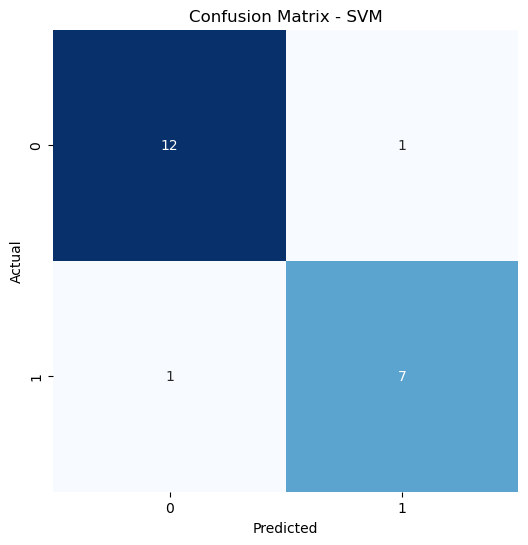

Training Random Forest...
Random Forest Training Accuracy: 1.0000
Random Forest Test Accuracy: 0.9048
Random Forest Precision: 0.9048
Random Forest Recall: 0.9048
Random Forest F1 Score: 0.9048

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



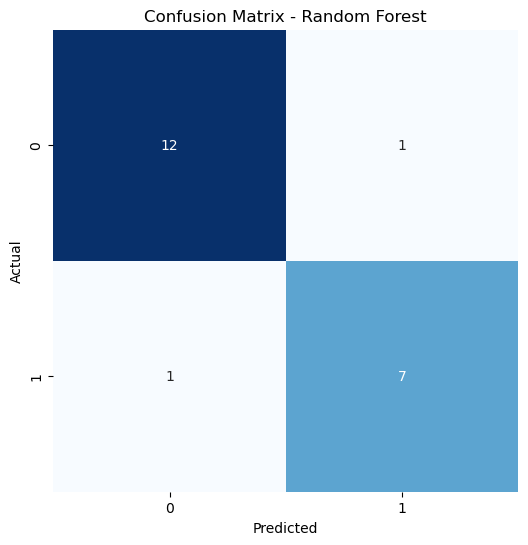

Training Decision Tree...
Decision Tree Training Accuracy: 1.0000
Decision Tree Test Accuracy: 0.8571
Decision Tree Precision: 0.8638
Decision Tree Recall: 0.8571
Decision Tree F1 Score: 0.8585

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.78      0.88      0.82         8

    accuracy                           0.86        21
   macro avg       0.85      0.86      0.85        21
weighted avg       0.86      0.86      0.86        21



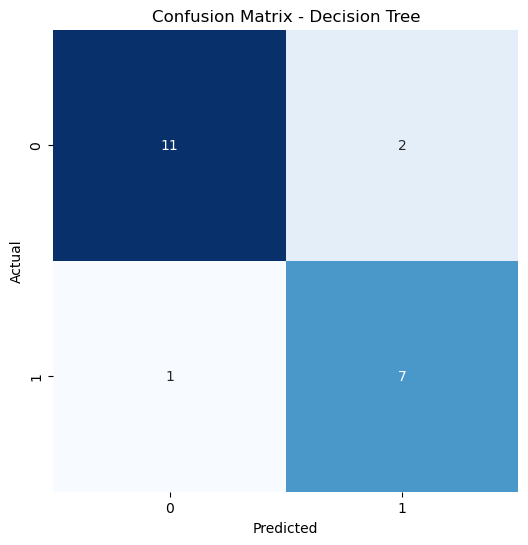

Training KNN...
KNN Training Accuracy: 0.9383
KNN Test Accuracy: 0.8571
KNN Precision: 0.8638
KNN Recall: 0.8571
KNN F1 Score: 0.8585

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.78      0.88      0.82         8

    accuracy                           0.86        21
   macro avg       0.85      0.86      0.85        21
weighted avg       0.86      0.86      0.86        21



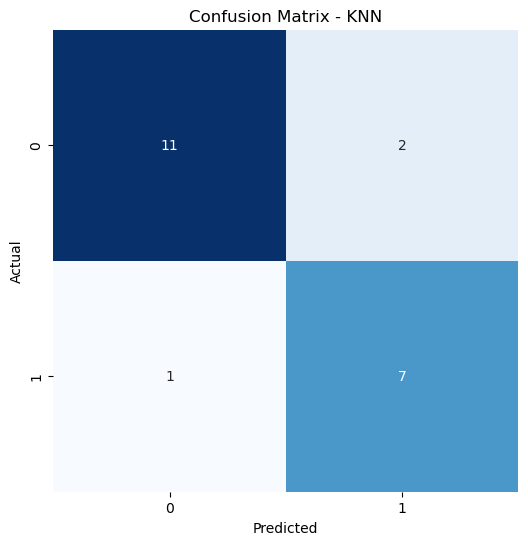

Training ANN...
ANN Training Accuracy: 1.0000
ANN Test Accuracy: 0.9048
ANN Precision: 0.9048
ANN Recall: 0.9048
ANN F1 Score: 0.9048

Classification Report for ANN:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



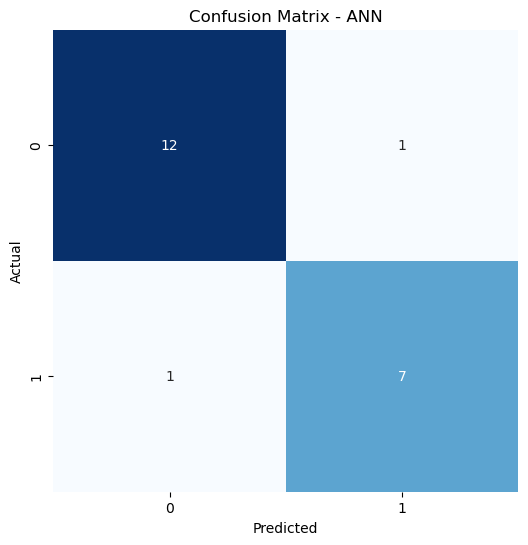

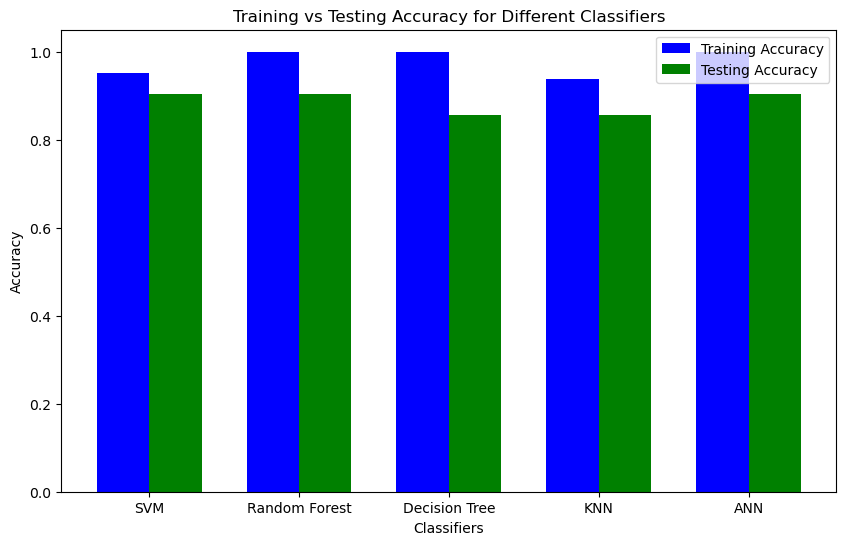

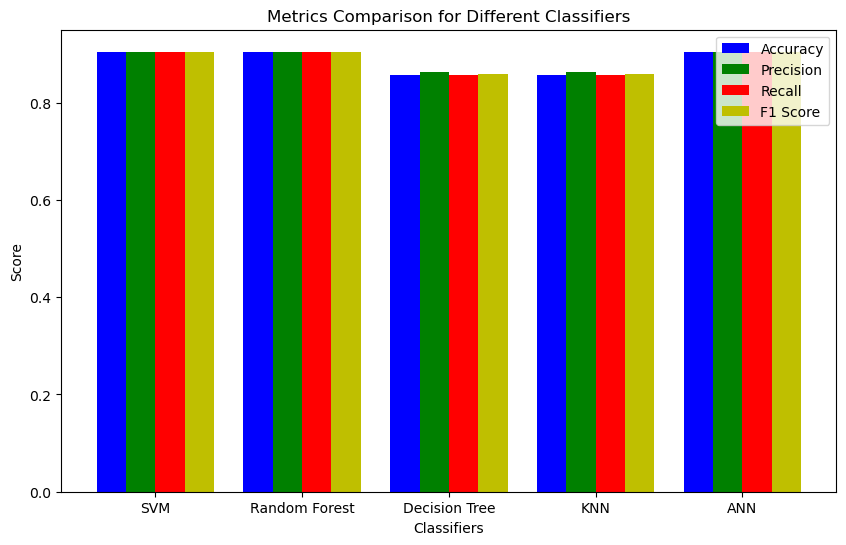


Metrics Table:
      Classifier  Train Accuracy  Test Accuracy  Precision    Recall  F1 Score
0            SVM        0.950617       0.904762   0.904762  0.904762  0.904762
1  Random Forest        1.000000       0.904762   0.904762  0.904762  0.904762
2  Decision Tree        1.000000       0.857143   0.863757  0.857143  0.858487
3            KNN        0.938272       0.857143   0.863757  0.857143  0.858487
4            ANN        1.000000       0.904762   0.904762  0.904762  0.904762


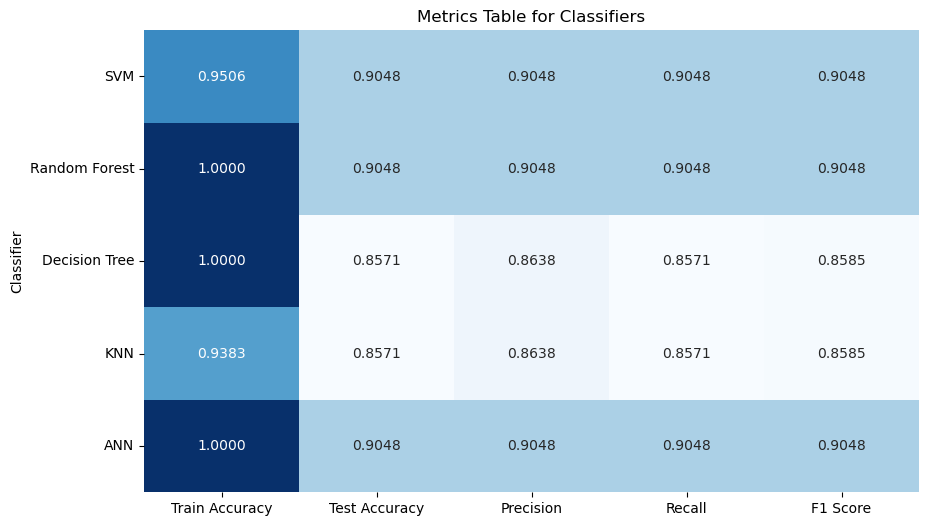

In [125]:
# Import necessary libraries for metrics and plotting
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import random
np.random.seed(42)
random.seed(42)

# Initialize classifiers
classifiers = {
    'SVM': svm.SVC(kernel='poly',degree=3),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'ANN': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000,random_state=42)
}

# Split data for train and test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_top_500, y, test_size=0.2, random_state=42)

# Ensure that X_train and X_test are in a C-contiguous array format
X_train2 = np.ascontiguousarray(X_train2)
X_test2 = np.ascontiguousarray(X_test2)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Function to plot training and testing accuracy together
def plot_train_test_accuracy(train_accuracies, test_accuracies, classifier_names):
    index = np.arange(len(classifier_names))
    bar_width = 0.35

    plt.figure(figsize=(10, 6))
    
    # Bar graph for training and testing accuracy
    plt.bar(index, train_accuracies, bar_width, label='Training Accuracy', color='b')
    plt.bar(index + bar_width, test_accuracies, bar_width, label='Testing Accuracy', color='g')
    
    plt.xlabel('Classifiers')
    plt.ylabel('Accuracy')
    plt.title('Training vs Testing Accuracy for Different Classifiers')
    plt.xticks(index + bar_width / 2, classifier_names)
    plt.legend()
    plt.show()

# Function to plot accuracy, precision, recall, and F1-score together
def plot_all_metrics(metrics_results, classifier_names):
    index = np.arange(len(classifier_names))
    bar_width = 0.2

    plt.figure(figsize=(10, 6))
    
    # Bar graph for all metrics
    plt.bar(index, metrics_results['Test Accuracy'], bar_width, label='Accuracy', color='b')
    plt.bar(index + bar_width, metrics_results['Precision'], bar_width, label='Precision', color='g')
    plt.bar(index + 2 * bar_width, metrics_results['Recall'], bar_width, label='Recall', color='r')
    plt.bar(index + 3 * bar_width, metrics_results['F1 Score'], bar_width, label='F1 Score', color='y')
    
    plt.xlabel('Classifiers')
    plt.ylabel('Score')
    plt.title('Metrics Comparison for Different Classifiers')
    plt.xticks(index + 1.5 * bar_width, classifier_names)
    plt.legend()
    plt.show()

# Evaluate each classifier and store results
metrics_results = {
    'Classifier': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, clf in classifiers.items():
    print(f"Training {name}...")

    # Fit the classifier
    clf.fit(X_train2, y_train2)

    # Predictions on training and test sets
    y_train_pred = clf.predict(X_train2)
    y_test_pred = clf.predict(X_test2)

    # Accuracy for training and test sets
    train_accuracy = accuracy_score(y_train2, y_train_pred)
    test_accuracy = accuracy_score(y_test2, y_test_pred)
    
    # Compute precision, recall, and F1-score for the test set
    precision = precision_score(y_test2, y_test_pred, average='weighted')
    recall = recall_score(y_test2, y_test_pred, average='weighted')
    f1 = f1_score(y_test2, y_test_pred, average='weighted')

    print(f"{name} Training Accuracy: {train_accuracy:.4f}")
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")
    print(f"{name} Precision: {precision:.4f}")
    print(f"{name} Recall: {recall:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")

    # Print classification report for the test set
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test2, y_test_pred))

    # Plot confusion matrix
    plot_confusion_matrix(y_test2, y_test_pred, name)

    # Store the metrics results
    metrics_results['Classifier'].append(name)
    metrics_results['Train Accuracy'].append(train_accuracy)
    metrics_results['Test Accuracy'].append(test_accuracy)
    metrics_results['Precision'].append(precision)
    metrics_results['Recall'].append(recall)
    metrics_results['F1 Score'].append(f1)

# Plot training vs testing accuracy
plot_train_test_accuracy(metrics_results['Train Accuracy'], metrics_results['Test Accuracy'], metrics_results['Classifier'])

# Plot accuracy, precision, recall, and F1 score together
plot_all_metrics(metrics_results, metrics_results['Classifier'])

# Create a table for the metrics
metrics_df = pd.DataFrame({
    'Classifier': metrics_results['Classifier'],
    'Train Accuracy': metrics_results['Train Accuracy'],
    'Test Accuracy': metrics_results['Test Accuracy'],
    'Precision': metrics_results['Precision'],
    'Recall': metrics_results['Recall'],
    'F1 Score': metrics_results['F1 Score']
})

print("\nMetrics Table:")
print(metrics_df)

# Optionally display the table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df.set_index('Classifier'), annot=True, fmt='.4f', cmap='Blues', cbar=False)
plt.title('Metrics Table for Classifiers')
plt.show()


In [126]:
X.shape,X_train2.shape


((102, 6033), (81, 500))

In [127]:
y.shape

(102,)

In [128]:
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
# Ensure that X_train and X_test are in a C-contiguous array format

X_train, X_test, y_train, y_test = train_test_split(X_top_500, y, test_size=0.2, random_state=42)
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)
# Example dataframes for rankings, assuming you have the rankings already
# Replace this with your actual ranking DataFrames
rankings_df = pd.DataFrame({
    'Feature': X.columns,
    'ReliefF': relief_ranking,
    'mRMR': mrmr_scores,
    'LASSO': lasso_feature_ranking,
    'RFE': rfe_ranking
})

# Helper function to select top 500 features from each ranking method
def select_top_500_features(ranking_method):
    # Sort the features based on the method and select the top 500
    top_500 = rankings_df.sort_values(by=ranking_method).head(500)['Feature']
    return X[top_500]

# Classifiers initialization
classifiers = {
    'SVM': SVC(kernel='poly', degree=3),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'ANN': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# To store results
results = {'Method': [], 'Classifier': [], 'Train Accuracy': [], 'Test Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Evaluate each method
methods = ['ReliefF', 'mRMR', 'LASSO', 'RFE']
for method in methods:
    print(f"\nEvaluating for top 500 features from {method}...")

    # Select the top 500 features for the current method
    X_top_500 = select_top_500_features(method)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_top_500, y, test_size=0.2, random_state=42)
    X_train = np.ascontiguousarray(X_train)
    X_test = np.ascontiguousarray(X_test)
    # Evaluate each classifier
    for name, clf in classifiers.items():
        print(f"Training {name} for {method} features...")

        # Fit the classifier
        clf.fit(X_train, y_train)

        # Predictions
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        # Calculate metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred, average='macro')
        recall = recall_score(y_test, y_test_pred, average='macro')
        f1 = f1_score(y_test, y_test_pred, average='macro')

        # Store the results
        results['Method'].append(method)
        results['Classifier'].append(name)
        results['Train Accuracy'].append(train_accuracy)
        results['Test Accuracy'].append(test_accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1 Score'].append(f1)

# Convert the results to a DataFrame for easier visualization
results_df = pd.DataFrame(results)

# Display the results
print("\nMetrics Table:")
print(results_df)



Evaluating for top 500 features from ReliefF...
Training SVM for ReliefF features...
Training Random Forest for ReliefF features...
Training Decision Tree for ReliefF features...
Training KNN for ReliefF features...
Training ANN for ReliefF features...

Evaluating for top 500 features from mRMR...
Training SVM for mRMR features...
Training Random Forest for mRMR features...
Training Decision Tree for mRMR features...
Training KNN for mRMR features...
Training ANN for mRMR features...

Evaluating for top 500 features from LASSO...
Training SVM for LASSO features...
Training Random Forest for LASSO features...
Training Decision Tree for LASSO features...
Training KNN for LASSO features...
Training ANN for LASSO features...

Evaluating for top 500 features from RFE...
Training SVM for RFE features...
Training Random Forest for RFE features...
Training Decision Tree for RFE features...
Training KNN for RFE features...
Training ANN for RFE features...

Metrics Table:
     Method     Classi